## 3. 이진화

---

- 영상/동영상의 어느 지점을 기준으로, 픽셀을 분류해서 제외해야 할 때가 있다.
- 이 때 특정 값을 기준으로 값이 높은 픽셀을 검은색, 낮은 픽셀을 흰색으로 변경한다.
- 기준값에 따라 픽셀을 이분법적으로 구분해 픽셀을 참/거짓으로 나누는 연산이다.

In [ ]:
# Python OpenCV의 이진화 함수
retval, dst = cv2.threshold(
    src,    # 입력 이미지
    thresh, # 임곗값
    maxval, # 최댓값
    type    # 임곗값 형식
)

- 임곗값(thresh)보다 낮은 픽셀값은 0이나 원본 픽셀값으로 변경
- 임곗값보다 높은 픽셀값은 최댓값(maxval)으로 변경

- 일반적으로 이진화 함수는 단일 채널 이미지에서 활용
- 다중 채널 이미지에 이진화 함수를 적용할 경우 각 채널을 분리해서 이진화 함수를 적용한 후 이미지를 다시 병합해서 반환

In [8]:
import cv2

origin = cv2.imread('swan.jpg')

cv2.imshow("origin", origin)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# 예제 5.8 Python OpenCV의 이진화
import cv2

src = cv2.imread('swan.jpg')
_, binary = cv2.threshold(src, 127, 255, cv2.THRESH_BINARY)

cv2.imshow("binary", binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

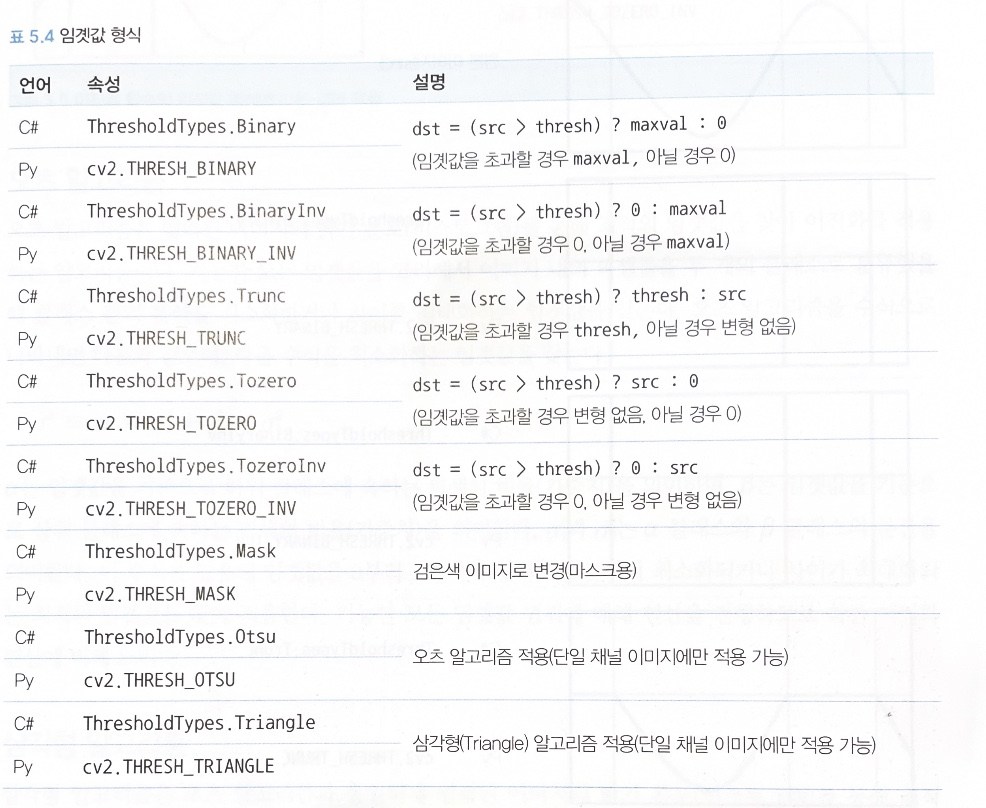

---

### 오츠 알고리즘

- 입력된 이미지의 밝기 분포(히스토그램)를 통해 최적의 임곗값을 찾아 이진화를 적용하는 알고리즘
- 가능한 모든 값을 시험해보고, 이미지 내의 픽셀을 두 개의 클래스로 분류했을 때 클래스 간의 분산을 최소화하거나 차이를 최대화하는 값을 찾는다.
- 다음 수식을 써서, 수식을 최소화하는 임곗값을 찾는다.

- $\alpha$ : 임곗값을 기준으로 하위 클래스에 속하는 픽셀의 비율(가중치)을 의미
- $\beta$ : 임곗값을 기준으로 상위 클래스에 속하는 픽셀의 비율(가중치)을 의미
- $\sigma$ : $\alpha$클래스와 $\beta$클래스의 분산을 의미

- 위 수식을 활용해 임곗값을 0부터 255까지 입력해서 분산이 최소화되거나 차이가 최대화되는 최적의 임곗값을 찾아 적용
- 가능한 모든 임곗값 범위에 대해 연산을 진행하므로 다른 이진화 연산에 비해 느리다.

---

### 삼각형 알고리즘

- 오츠 알고리즘과 동일하게 모든 입력된 이미지의 밝기 분포를 통해, 최적의 임계값을 찾아 이진화를 적용하는 알고리즘이지만
- 오츠 알고리즘과는 다르게 모든 값을 대입하지는 않는다.
- 히스토그램에서 최대 거리를 구성할 수 있는 임계값을 찾아 이진화를 적용한다.

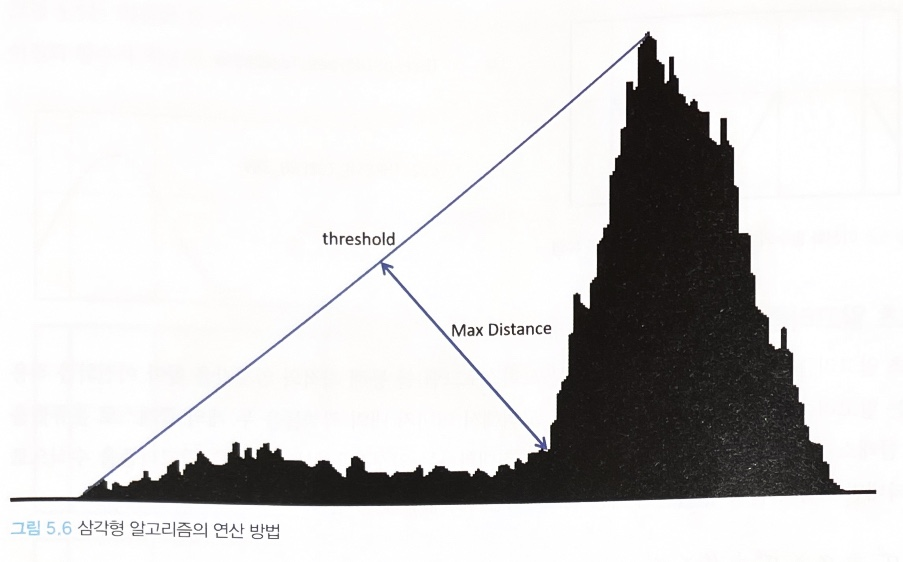

---

### 적응형 이진화 알고리즘

- 입력 이미지에 따라 임곗값이 스스로 다른 값을 할당할 수 있도록 구성된 알고리즘.
- 이미지에 따라 어떤 값을 주던지, 이진화 처리가 어려운 이미지가 존재한다.
- 조명의 변화나 반사가 심한 경우
- 이미지 내의 밝기 분포가 달라 다 다른 임계값을 적용해야 하는 경우

In [ ]:
# Python OpenCV의 적응형 이진화 함수
dst = cv2.adaptiveThreshold(
    src,
    maxval,          # 최댓값
    adaptiveMethod,  # 적응형 이진화 방식
    thresholdType,   # 임곗값 형식
    blockSize,       # 픽셀 주변 영역
    C                # 상수값(check this out!)
)

- blockSize와 상수 C에 따라 설정되는 임곗값의 결과가 달라진다.
- blockSize는 중심점이 존재할 수 있게 홀수만 가능
- 상수 C는 일반적으로 양수의 값을 사용하지만 경우에 따라 0이나 음수도 사용 가능

In [12]:
# 예제 5.10 Python OpenCV에서의 적응형 이진화
import cv2

src = cv2.imread('swan.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, -5)
                            #  src   maxval     adaptiveMethod          thresholdType    bS   C

cv2.imshow('binary', binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

---

## 4. 이미지 연산

- 이미지 연산은 하나 또는 둘 이상의 이미지에 대해 수학적 연산을 수행하는 것이다.

1. 덧셈 함수
2. 뺄셈 함수
3. 곱셈 함수
4. 나눗셈 함수
5. 최댓값 함수
6. 최솟값 함수
7. 절댓값 함수
8. 절댓값 차이 함수
9. 비교 함수
10. 선형 방정식 시스템의 해 찾기 함수
11. AND 연산 함수
12. OR 연산 함수
13. XOR 연산 함수
14. NOT 연산 함수

---

### 덧셈 함수

In [ ]:
dst = cv2.add(
    src1,
    src2,
    mask = None,
    dtype = None
)

- 덧셈 함수는 배열과 배열 또는 배열과 스칼라의 요소별 합을 계산
- src1과 src2의 각 요소를 더한 결과를 dtype 형식의 배열 dst에 저장
- 정밀도에 따라 요소의 최대값과 최소값이 있지만, 최대값을 넘어가거나 최소값보다 낮아질 수 없다.
- 덧셈 함수는 최댓값을 넘어가기 쉽기 때문에, 두 배열의 요소를 잘 고려해야 한다.
- 마스크 배열이 존재할 경우 mask 배열의 요솟값이 0이 아닌 경우에만 연산이 유효

---

### 뺄셈 함수

In [ ]:
dst = cv2.subtract(
    src1,
    src2,
    mask = None,
    dtype = None
)

- 뺄셈 함수는 배열과 배열 또는 배열과 스칼라의 요소별 합을 계산
- src1과 src2의 각 요소를 더한 결과를 dtype 형식의 배열 dst에 저장
- 스칼라 연산 시 스칼라의 요솟값이 음수일 경우 덧셈으로 연산이 수행
- 정밀도에 따라 요소의 최대값과 최소값이 있지만, 최대값을 넘어가거나 최소값보다 낮아질 수 없다.
- 뺄셈 함수는 최솟값보다 낮아지기 쉽기 때문에, 두 배열의 요소를 잘 고려해야 한다.
- 마스크 배열이 존재할 경우 mask 배열의 요솟값이 0이 아닌 경우에만 연산이 유효

---

### 곱셈 함수

In [ ]:
dst = cv2.multiply(
    src1,
    src2,
    scale = None,
    dtype = None
)

- 곱셈 함수는 배열과 배열 또는 스칼라의 요소별 곱에 추가로 scale을 곱한 값을 계산
- src1과 src2의 각 요소를 곱한 결과를 dtype 형식의 배열 dst에 저장
- 스칼라 연산 시 스칼라의 요솟값이 음수일 경우 음수로 연산이 수행되어 최솟값으로 변경됨
- 정밀도에 따라 요소의 최대값과 최소값이 있지만, 최대값을 넘어가거나 최소값보다 낮아질 수 없다.
- 곱셈 함수는 최댓값을 넘어가기 쉽기 때문에, 두 배열의 요소를 잘 고려해야 한다.
- 곱셈 함수는 정밀도가 정수형일 경우 소수점 단위는 버림 처리한다.

---

### 나눗셈 함수

In [ ]:
dst = cv2.divide(
    src1,
    src2,
    scale = None,
    dtype = None
)

- 나눗셈 함수는 배열과 배열 또는 배열과 스칼라의 요소별 나눗셈에 추가로 scale을 곱한 값을 계산
- src1과 src2의 각 요소를 나눈 결과를 dtype 형식을 갖는 배열 dst에 저장
- 스칼라 연산 시 스칼라의 요솟값이 음수일 경우 음수로 연산이 진행되어 최솟값으로 변경된다.
- 정밀도에 따라 요소의 최댓값과 최솟값이 있으며, 최댓값을 넘어가거나 최솟값보다 낮아질 수 없다.
- 나눗셈 함수는 추가로 scale에서 배열 또는 스칼라 요소를 나눌 수 있다.
- 나눗셈 함수는 정밀도가 정수형일 경우 소수점 단위는 버림 처리한다.

---

### 최댓값 함수

In [ ]:
dst = cv2.max(
    src1,
    src2
)

- 최댓값 함수는 배열과 배열 또는 배열과 스칼라의 요소별 최댓값을 계산
- src1과 src2의 각 요소의 최댓값 결과를 입력 배열과 같은 형식을 갖는 배열 dst에 저장
- 정밀도에 따라 요소의 최댓값과 최솟값이 있으며, 최댓값을 넘어가거나 최솟값보다 낮아질 수 없다.
- 최댓값 함수는 추가로 src2에 스칼라 값이 아닌 double 형식의 값을 활용해 배열 요소의 최댓값을 비교할 수 있다.

### 최솟값 함수

In [ ]:
dst = cv2.min(
    src1,
    src2
)

- 최솟값 함수는 배열과 배열 또는 배열과 스칼라의 요소별 최솟값을 계산
- src1과 src2의 각 요소의 최솟값 결과를 입력 배열과 같은 형식을 갖는 배열 dst에 저장
- 정밀도에 따라 요소의 최댓값과 최솟값이 있으며, 최댓값을 넘어가거나 최솟값보다 낮아질 수 없다
- 최솟값 함수는 추가로 src2에 스칼라 값이 아닌 double 형식의 값을 활용해 배열 요소의 최솟값을 비교할 수 있다.

---

### 최소/최대 위치 반환 함수

In [ ]:
minVal, maxVal, minLoc, maxLoc = np.minMaxLoc(
    src
)

- 최소/최대 위치 반환 함수는 배열의 최솟값과 최댓값의 위치와 값을 반환
- minVal과 minLoc은 최솟값과 최솟값의 위치가 반환
- maxVal과 maxLoc은 최댓값과 최댓값의 위치가 반환

---

### 절댓값 함수

In [ ]:
dst = np.abs(
    src
)

- 절댓값 함수는 배열의 요소별 절댓값을 계산
- src의 각 요소의 절댓값 결과를 입력 배열과 같은 형식의 dst 배열에 저장
- Python OpenCV의 경우 절댓값 함수가 없기 때문에 Numpy 라이러리의 절댓값 함수를 활용

### 절댓값 차이 함수

In [ ]:
dst = cv2.absdiff(
    src1,
    src2
)

- 절댓값 차이 함수는 배열과 배열 또는 배열과 스칼라의 요소별 절댓값 차이를 계산
- src1과 src2의 각 요소의 절댓값 차이 결과를 입력 배열과 같은 형식을 갖는 배열 dst에 저장
- 절댓값 차이 함수는 덧셈 함수나 뺄셈 함수 등에서 요소의 최댓값 보다 크거나 최솟값 보다 작을 때 발생하는 오버/언더플로 문제를 피할 수 있다.
- 덧셈 함수나 뺄셈 함수에서는 두 배열의 요소를 서로 뺄셈했을 때 음수가 발생하면 0을 반환했지만 절댓값 차이 함수는 이 값을 절댓값으로 변경해서 양수 형태로 반환한다.

---

### 비교 함수

In [ ]:
dst = cv2.compare(
    src1,
    src2,
    cmpop
)

- 비교 함수는 배열과 배열 또는 배열과 스칼라의 요소별 비교 연산을 수행
- src1과 src2의 각 요소의 비교 결과를 입력 배열과 같은 형식을 갖는 배열 dst에 저장
- 비교 함수는 cmpop 매개 변수를 활용해 모든 요소에 대해 일대일 비교 연산을 수행할 수 있다.
- 비교 결과가 True일 경우 요소의 값을 255로 변경
- 비교 결과가 False일 경우 요소의 값을 0으로 변경

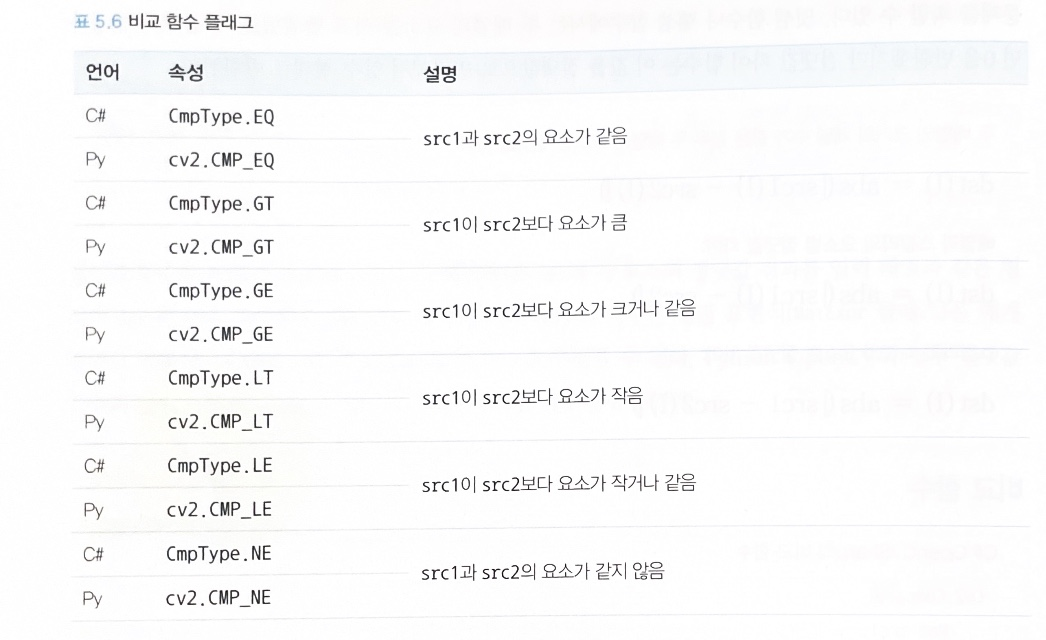

---

### 선형 방정식 시스템의 해 찾기 함수

In [ ]:
success, dst = cv2.solve(
    src1,
    src2,
    flags = None
)

- 선형 방정식 시스템의 해 찾기 함수는 역함수를 기반으로 선형 시스템의 해를 빠르게 구해서 반환
- 선형 방정식 시스템은 부동 소수점 형식(float, double)만 지원
- src1은 정방 행렬(n X n)이며 src2는 벡터(n X 1)
- dst는 결과 배열고 n X 1의 최적 벡터 X를 구한다.
- flags는 선형 시스템에서 해를 구하는 데 사용한 플래그를 의미
- 해를 찾았을 경우 Python OpenCV에서는 논리 형식의 success와 ndarray 형식의 dst를 함께 반환

---

### AND 연산 함수

In [ ]:
dst = cv2.bitwise_and(
    src1,
    src2,
    mask = None
)

- AND 연산 함수는 배열과 배열 또는 배열과 스칼라의 요소별 비트 단위 논리곱 연산을 수행
- 배열 src1과 src2의 값을 비트 단위로 파악하며, 해당 비트에 대해 AND 연산을 진행
- 반환된 결과를 입력 배열과 같은 형식을 갖는 배열 dst에 저장

---

### OR 연산 함수

In [ ]:
dst = cv2.bitwise_or(
    src1,
    src2,
    mask = None
)

- OR 연산 함수는 배열과 배열 또는 배열과 스칼라의 요소별 비트 단위 논리합 연산을 수행
- 배열 src1과 src2의 값을 비트 단위로 파악하며, 해당 비트에 대해 OR 연산을 수행
- 반환된 결과를 입력 배열과 같은 형식을 갖는 배열 dst에 저장

---

### XOR 연산 함수

In [ ]:
dst = cv2.bitwise_xor(
    src1,
    src2,
    mask = None
)

- XOR 연산 함수는 배열과 배열 또는 배열과 스칼라의 요소별 비트 단위 XOR 연산을 수행
- 배열 src1과 src2의 값을 비트 단위로 파악하며, 해당 비트에 대해 XOR 연산을 수행
- 반환된 결과를 입력 배열과 같은 형식을 갖는 배열 dst에 저장

---

### NOT 연산 함수

In [ ]:
dst = cv2.bitwise_not(
    src,
    mask = None
)

- NOT 연산 함수는 배열 또는 스칼라의 요소별 비트 단위 반전 연산을 수행
- 배열 src의 값을 비트 단위로 파악하며, 각 비트에 대해 반전 연산을 수행한다.
- 반환된 결과를 입력 배열과 같은 형식을 갖는 배열 dst에 저장

In [1]:
# 예제 5.12 Python OpenCV의 선형 방정식 시스템의 해 찾기 함수
import cv2
import numpy as np

src1 = np.array([[9, 2], [1, 1]], dtype = np.double)
src2 = np.array([38, 5], dtype = np.double)

dst = cv2.solve(src1, src2, flags = cv2.DECOMP_LU)

print(dst)

(True, array([[4.],
       [1.]]))


---

## 5. 흐림 효과

- 흐림 효과는 블러링(Blurring) 또는 스무딩(Smoothing)이라 부름
- 노이즈를 줄이거나 외부 영향을 최소화하는 데 사용
- 흐림 효과는 단순히 이미지를 흐리게 만드는 것뿐만 아니라 노이즈를 제거해서 연산 시 계산을 빠르고 정확하게 수행하는 데 도움이 됨
- 이미지의 해상도를 변경하는 경우에도 사용
- 이미지의 크기를 변경하면 존재하지 않는 데이터를 생성하거나 존재하는 데이터를 줄여야 하므로 샘플링된 이미지를 재구성할 때도 사용

- 흐림 효과 함수의 중요 매개 변수
    - 커널
    - 고정점
    - 테두리 외삽법

### 커널과 고정점

#### 커널

- 커널(kernel)은 이미지에서 (x, y)의 픽셀과 해당 픽셀 주변을 포함한 작은 크기의 공간을 의미
- 신호 처리 분야에서는 커널을 필터(filter)라고도 한다.
- 새로운 픽셀을 만들어 내기 위해 커널 크기의 화소 값을 이용해 어떤 시스템을 통과해 계산하는 것을 컨벌루션(Convolution)이라 한다.
- 컨벌루션의 예로 이미지를 흐리게 만드는 블러링(Blurring), 이미지의 윤곽을 선명하게 만드는 샤프닝(Sharpening), 이미지 명도의 변화량을 구하는 미분(Gradient Laplacian) 등이 있다.

#### 고정점

- 고정점(anchor point)은 커널을 통해 컨벌루션된 값을 할당한 지점
- 커널 내에서 고정점은 하나의 지점을 가지며, 이미지와 어떻게 정렬되는지를 나타낸다.

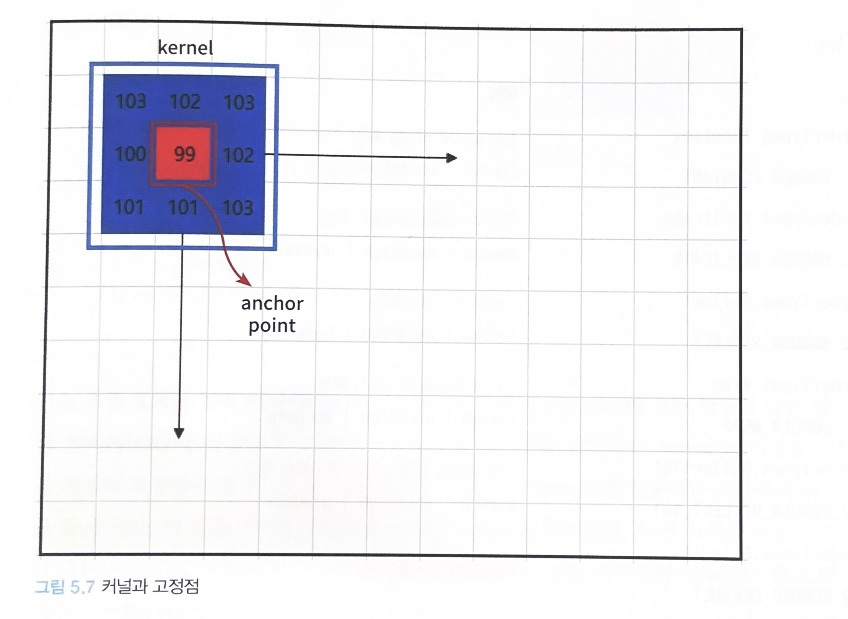

- 일반적으로 커널은 3x3, 5x5, 7x7 등의 홀수의 값을 갖는 크기를 활용
- 고정점은 주로 중심부에 위치
- 그런데 모든 픽셀에 컨벌루션을 진행하면 이미지의 테두리 부분을 처리할 때 문제가 발생한다.
- 처리할 수 없는 좌표가 발생하며 이를 테두리 외삽법으로 문제를 해결

### 테두리 외삽법

- 테두리 외삽법은 테두리의 이미지 바깥쪽에 가상의 픽셀을 만들어 처리한다.
- 외삽법으로 가상의 픽셀 값을 할당하는데, 가상 픽셀의 값을 0으로 처리하거나 커널이 연산할 수 있는 부분부터 연산을 수행하기도 한다.

---

### 단순 흐림 효과

In [ ]:
dst = cv2.blur(
    src,
    ksize, # 커널의 크기
    anchor = None, # 커널을 정렬하는 방식(null 값이나 None 값을 사용하면 고정점의 위치는 (-1, -1))
    borderType = None # 테두리 외삽법
)

- 단순 흐림 효과는 입력 이미지의 각 픽셀에 대해 커널을 적용해 모든 픽셀의 단순 평균을 구해 출력 이미지에 저장

---

### 박스 필터 흐림 효과

In [ ]:
dst = cv2.boxFilter(
    src,
    ddepth, # 출력 이미지의 정밀도를 설정
    ksize,
    anchor = None,
    normalize = None, # 커널의 영역별 정규화 여부를 설정
    borderType = None
)

- 박스 필터 함수의 경우 커널의 내부 값이 모두 같은 필터
- normalize의 값을 True로 지정할 경우 정규화된 박스 필터(normalized box filter)로 변경되며, 커널의 모든 값이 커널의 개수(면적)만큼 나눠진다.

---

### 중간값 흐림 효과

In [ ]:
dst = cv2.medianBlur(
    src,
    ksize
)

- 중간값 흐림 효과 함수는 고정점을 사용하지 않고 중심 픽셀 주변으로 사각형 크기의 이웃한 픽셀들의 중간값을 사용해 각 픽셀의 값을 변경
- 고정점이 항상 중심에 있다고 가정

---

### 가우시안 흐림 효과

In [ ]:
dst = cv2.GaussianBlur(
    src,
    ksize,
    sigmaX # x 방향의 가우스 커널 표준 편차
    sigmaY = None, # y 방향의 가우스 커널 표준 편차
    borderType = None
)

- 가우시안 흐림 효과 함수는 흐림 효과 함수에서 가장 유용한 함수
- 입력 이미지의 각 지점에 가우시안 커널을 적용해 합산한 다음, 출력 이미지를 반환
- sigmaY가 0인 경우 sigmaY의 값은 sigmaX의 값과 같아진다.
- 두 값(sigmaX, sigmaY)을 모두 0으로 설정한다면 커널의 크기에 의해 자동으로 설정된다.

---

### 양방향 필터 흐림 효과

In [ ]:
dst = cv2.bilateralFilter(
    src,
    d, # 지름(흐림 효과를 적용할 각 픽셀 영역의 지름)
    sigmaColor, # 시그마 색상(색상 공간에서 사용할 가우시안 커널의 너비를 설정)
    sigmaSpace, # 시그마 공간(좌표 공간에서 사용할 가우시안 커널의 너비를 설정)
    dst = None,
    borderType = None
)

- 양방향 필터 흐림 효과는 가장자리(Edge)를 선명하게 보존하면서 노이즈를 우수하게 제거하는 흐림 효과 함수
- 다른 흐림 효과 함수에 비해 느림
- 지름(d)이 클수록 수채화처럼 변형됨
- 지름(d)이 클수록 알고리즘의 처리 속도가 매우 느려짐
- 동영상을 처리하는 경우 5의 값을 사용하고 그렇지 않는 경우에는 9의 값을 사용

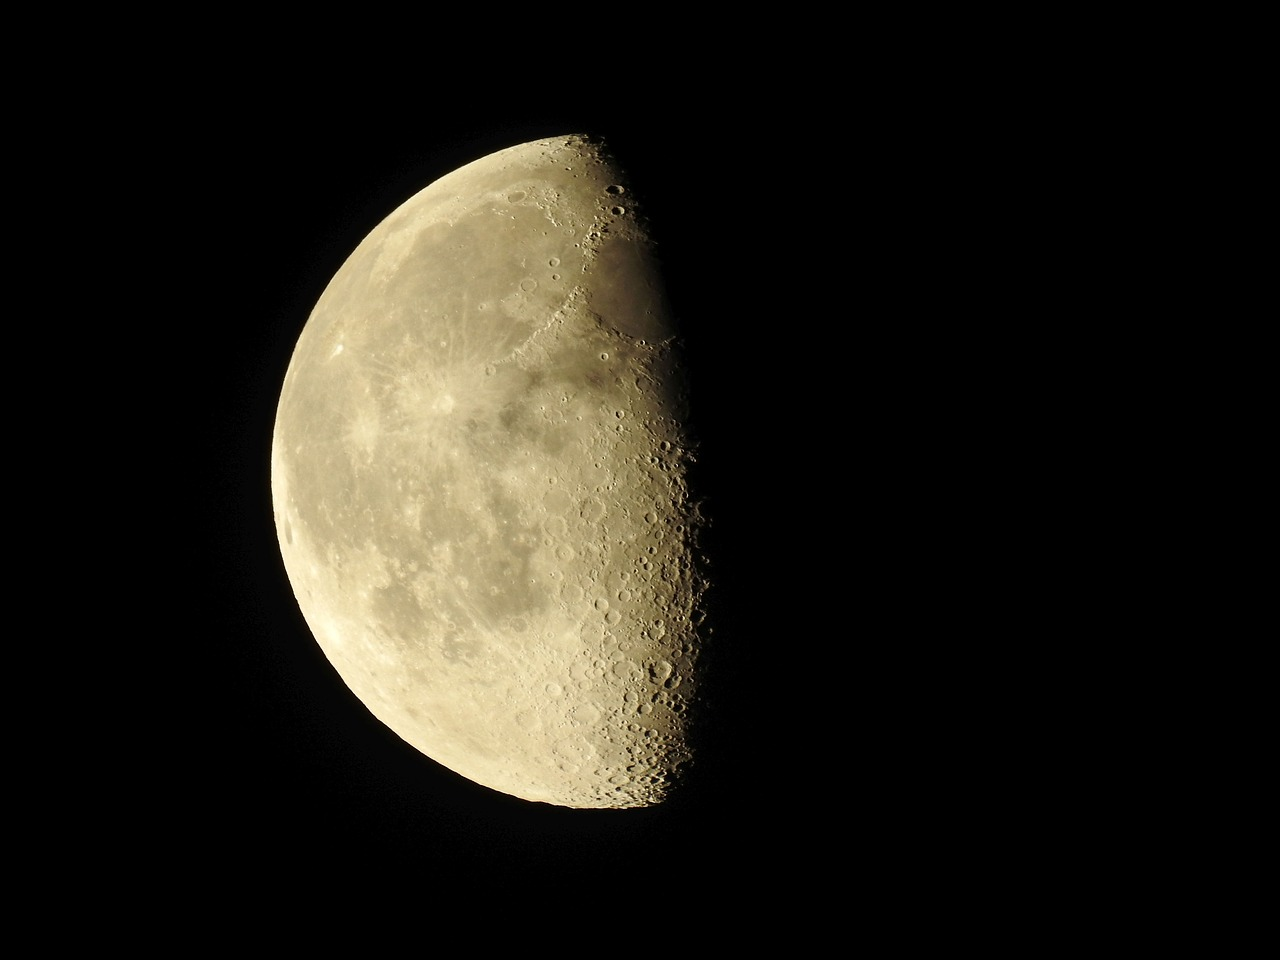

In [2]:
# 예제 5.14 Python OpenCV에서의 양방향 필터 흐림 효과 함수
import cv2

src = cv2.imread("crescent.jpg")

dst = cv2.bilateralFilter(src, 100, 33, 11, borderType=cv2.BORDER_ISOLATED)

cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()